#02 Classification using Neural Network in PyTorch

Classification is the problem of predicting if an object is one thing or another

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

# Creat circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [6]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


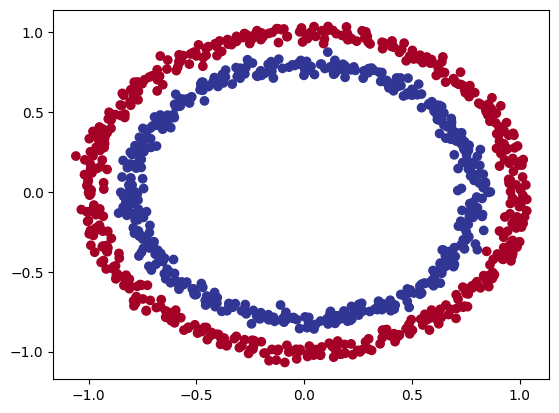

In [7]:
#Visualise this
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: dataset that we are working with is called the **Toy Dataset**, which means it's
small enough to experiment with but large enough to practive fundamentals

### Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

### Turn data into Tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.5.1+cu121'

In [11]:
type(X)

numpy.ndarray

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [13]:
type(X), X[:5], y[:5], y.dtype

(torch.Tensor,
 tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32)

In [14]:
#split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a Model

Make a model that will be able to tell if it's red dot or blue dot

Steps to building a model:

1.   Setting up device agnostic code so we can run on a GPU, if available
2.   Building a model by subclassing `nn.Module`
3.   Define a loss function and optimizer
4.   Building a training and testing loop





In [16]:
import torch
from torch import nn

In [17]:
#Make device agnostic code

device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Sub-Steps to creating model

1.   Subclass `nn.Module`
2.   Use `nn.Linear()`
3.   Define our forward method






In [18]:
#1. Construct a model that subclasses nn.moduel
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Creat a nn layer that can handle our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features = 1)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  #define forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return two_linear_layers(x)

#Instantiate our
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
#Replicating the model below with nn.sequential

model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3589, -0.3515],
                      [-0.5673,  0.3869],
                      [ 0.3169,  0.2853],
                      [-0.4533, -0.1463],
                      [ 0.5664,  0.7023]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4440, -0.4599, -0.3337,  0.5973, -0.1130], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3968, -0.1725, -0.2082, -0.1094, -0.2385]], device='cuda:0')),
             ('1.bias', tensor([-0.2031], device='cuda:0'))])

In [22]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"first 10 predictions{untrained_preds[:10]}")
print(f"First 10 values in y_test{y_test[:10]}")

first 10 predictionstensor([[-0.5870],
        [-0.6680],
        [-0.2000],
        [-0.6973],
        [ 0.0771],
        [ 0.0255],
        [-0.4223],
        [-0.2592],
        [-0.2123],
        [-0.6704]], device='cuda:0')
First 10 values in y_testtensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup a loss function and optimizers

Which loss function or optimizers to use?

For Regression we use **MAE** or **MSE**
For Classification we use **Binary Cross Entropy** or **Categorical Cross Entropy**

For optimizers the most used are SGD and Adam, but PyTorch has many others

For loss function we will use `torch.nn.BCEWithLogitsLoss()`


In [23]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [24]:
#Calculate accuracy - out of 100 how many times does our model get correct
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()

  acc = (correct/len(y_pred))*100
  return acc


## 3. Train model
1. Forward pass
2. Calcaulte the loss
3. Optimzers zero grad
4. Loss backward
5. optimizers step

Raw logit -> prediction probabilities -> prediction labels

Raw output of our model is called a **logit**
We conver these logits into **prediction probablilities** using an activation function (eg sigmoid for binary crossentropy and softmax for multiclass classification).

The we convert these predicatoin probablity into **prediction label** by either rounding them or taking `argmax()`

In [25]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5870],
        [-0.6680],
        [-0.2000],
        [-0.6973],
        [ 0.0771]], device='cuda:0')

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
#Sigmoid function to convert logit into prediction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3573],
        [0.3389],
        [0.4502],
        [0.3324],
        [0.5193]], device='cuda:0')

In [28]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

In [29]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()




tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

##Building a training and testing loop

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Building a training and evaluation loop
for epoch in range(epochs):
  ### TRAINING
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logit -> pred probs -> pred label

  #2. Loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. Optimizer s zero grad
  optimizer.zero_grad()

  #4. Loss backpropogation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###TESTING
  model_0.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2 test  loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.71291, Acc: 45.62% | Test Loss: 0.70391, Test Acc: 49.00%
Epoch: 10 | Loss: 0.70602, Acc: 47.75% | Test Loss: 0.69746, Test Acc: 50.50%
Epoch: 20 | Loss: 0.70268, Acc: 48.00% | Test Loss: 0.69465, Test Acc: 49.00%
Epoch: 30 | Loss: 0.70071, Acc: 48.38% | Test Loss: 0.69329, Test Acc: 51.50%
Epoch: 40 | Loss: 0.69935, Acc: 48.75% | Test Loss: 0.69257, Test Acc: 52.00%
Epoch: 50 | Loss: 0.69834, Acc: 48.50% | Test Loss: 0.69217, Test Acc: 53.00%
Epoch: 60 | Loss: 0.69753, Acc: 48.88% | Test Loss: 0.69195, Test Acc: 52.50%
Epoch: 70 | Loss: 0.69688, Acc: 49.00% | Test Loss: 0.69184, Test Acc: 52.50%
Epoch: 80 | Loss: 0.69634, Acc: 49.25% | Test Loss: 0.69179, Test Acc: 52.00%
Epoch: 90 | Loss: 0.69589, Acc: 49.25% | Test Loss: 0.69180, Test Acc: 52.00%


##4. Visualize the models


In [31]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("skipped")
else:
  print("downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloading


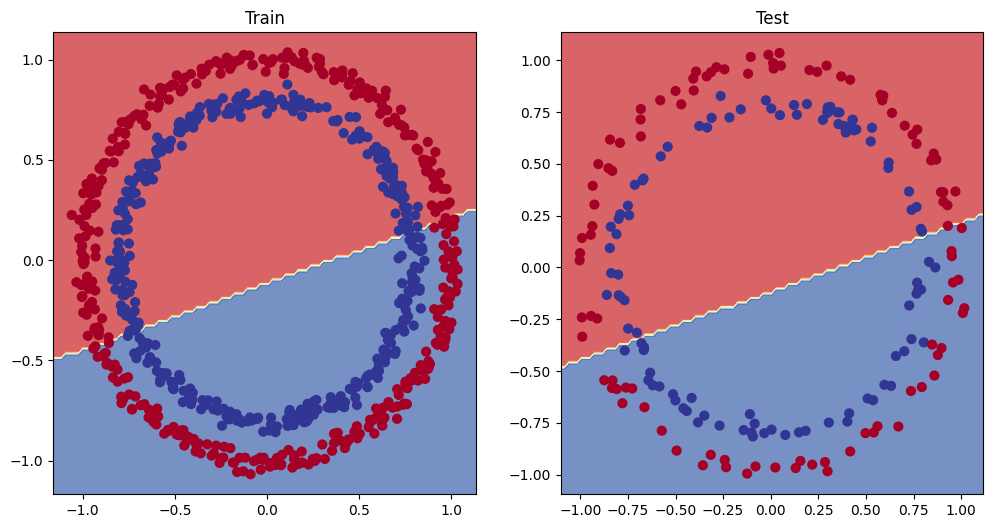

In [32]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a Model

*  Add more layers to improve the chnces of learning the data
*  Add more hidden units
*  Fit for longer, give more chances to learn
*  Change activation function
*  Change the learning rate
*  Change the loss function

These are from a model's perspective, but if we feel our model is perfect we can also change the data

We'll try the follow
*  *Adding more hidden units*
*  *Adding more layers*
*  *Increasing hte number of epochs*


In [33]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [35]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


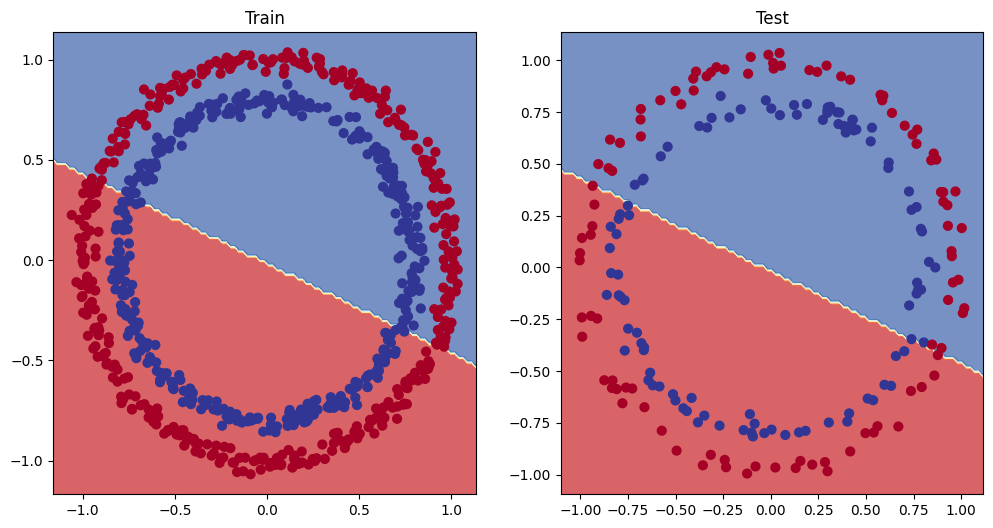

In [36]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

**Non-linearity**

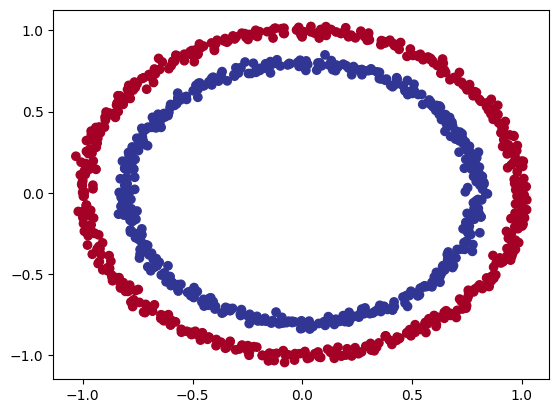

In [37]:
#Making the non linear data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.02, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [38]:
import torch
from sklearn.model_selection import train_test_split

#Convert from numpy to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)




In [39]:
#Building a classification model with non-linear activation fucntion
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() #non-linear activation function

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [41]:
### Training a model with non-linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  #forward function
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss calculation
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #opt zero grad
  optimizer.zero_grad()

  #backpropogation loss
  loss.backward()

  #step optimizers
  optimizer.step()

  ###TESTING
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Printing
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss}:.5f, Test Acc: {test_acc:.2f}%")







Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.6931265592575073:.5f, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69116, Acc: 52.75% | Test Loss: 0.6909139156341553:.5f, Test Acc: 53.00%
Epoch: 200 | Loss: 0.68980, Acc: 53.00% | Test Loss: 0.6892326474189758:.5f, Test Acc: 55.00%
Epoch: 300 | Loss: 0.68797, Acc: 53.00% | Test Loss: 0.6869673132896423:.5f, Test Acc: 56.50%
Epoch: 400 | Loss: 0.68516, Acc: 52.75% | Test Loss: 0.6837179660797119:.5f, Test Acc: 56.50%
Epoch: 500 | Loss: 0.68107, Acc: 52.62% | Test Loss: 0.6787903308868408:.5f, Test Acc: 56.50%
Epoch: 600 | Loss: 0.67518, Acc: 53.87% | Test Loss: 0.6718946099281311:.5f, Test Acc: 56.50%
Epoch: 700 | Loss: 0.66651, Acc: 57.75% | Test Loss: 0.6617487072944641:.5f, Test Acc: 59.00%
Epoch: 800 | Loss: 0.65148, Acc: 63.62% | Test Loss: 0.645508885383606:.5f, Test Acc: 67.50%
Epoch: 900 | Loss: 0.62331, Acc: 74.25% | Test Loss: 0.6184765696525574:.5f, Test Acc: 77.50%


In [42]:
###Visualizing a model with trained activatoin function

model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

y_preds[:5], y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [1.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

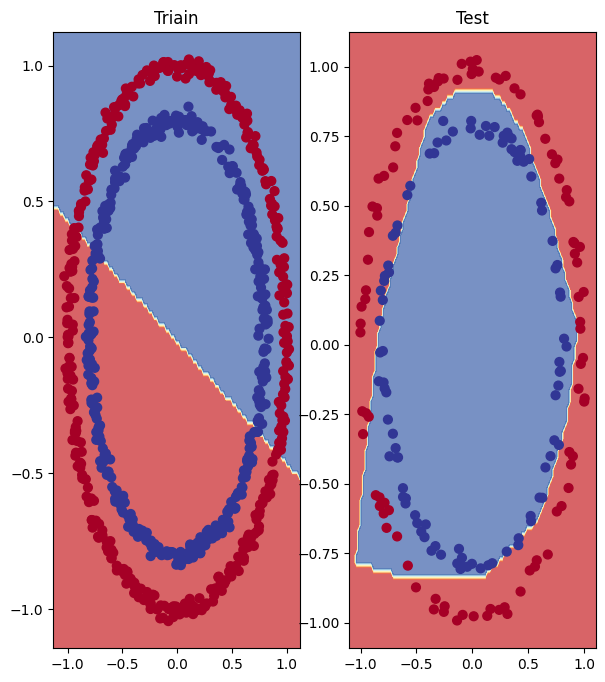

In [43]:
#Plot decision boundary

plt.figure(figsize=(7,8))
plt.subplot(1,2,1)
plt.title("Triain")

plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions

We give neural networks tools to find patterns itself

These patterns are linear and non-linear functions

In [44]:
 # Create a tensor
 A = torch.arange(-10,10,1, dtype=torch.float32)

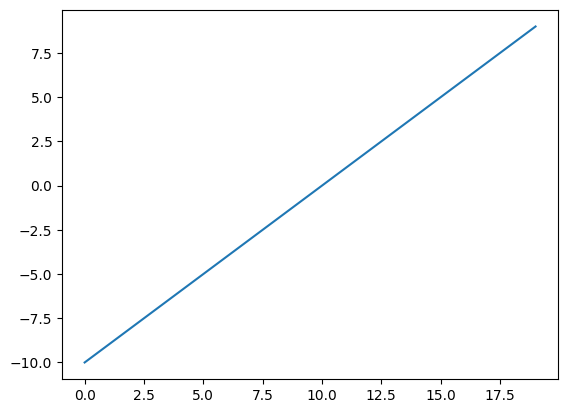

In [45]:
#Visualize the data
plt.plot(A)

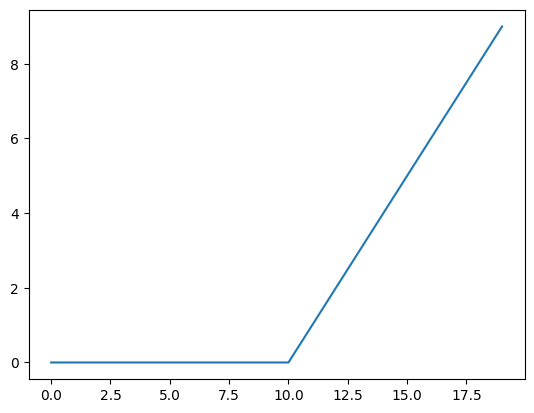

In [46]:
plt.plot(torch.relu(A))

In [47]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.max(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

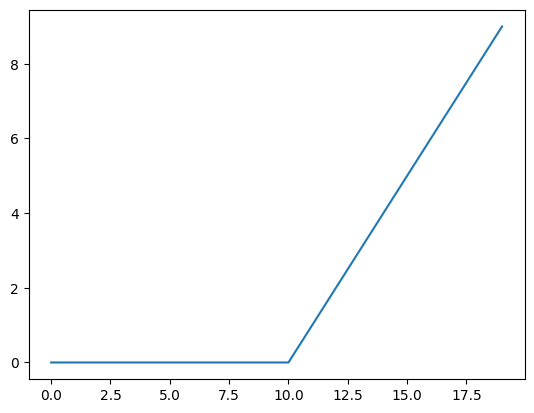

In [48]:
plt.plot(relu(A))

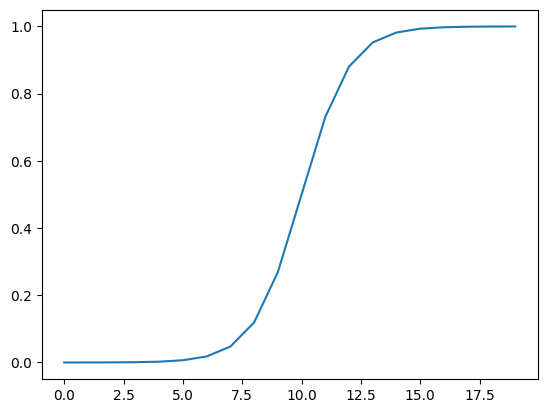

In [49]:
#Now let's do sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

plt.plot(torch.sigmoid(A))

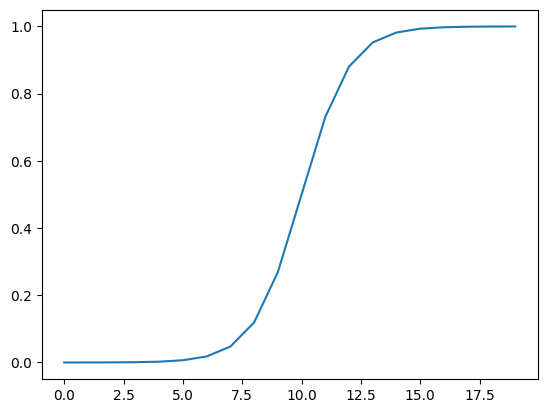

In [50]:
plt.plot(sigmoid(A))

## Putting it all together with a multi-class classification problem

* Binary classification -> one thing or another
* Multi-class classification -> more than two things

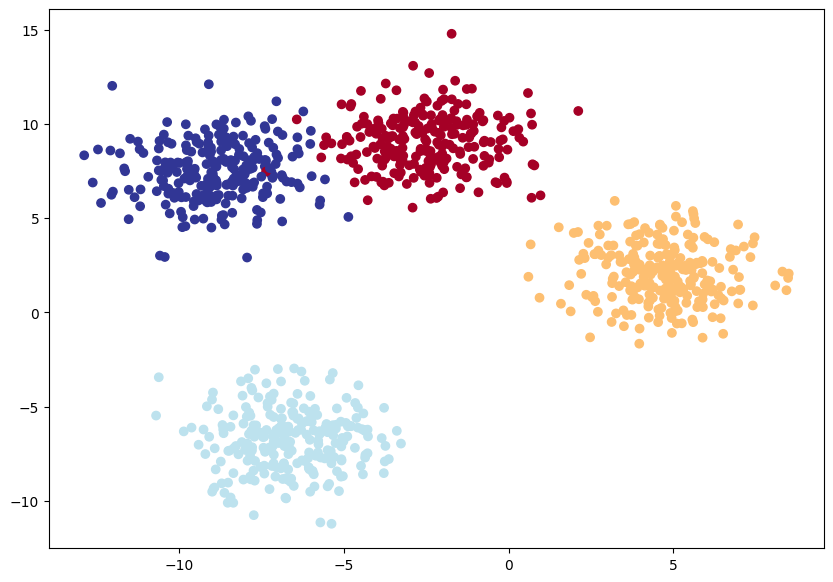

In [51]:
#Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED)

#Visualize the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [52]:
#Building a model for multi-class classification
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
torch.cuda.manual_seed(42)

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [53]:
#Creating a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(), lr=0.1)

### Getting prediction probabilities for a multi-class model

We need to convert out model's outputs (logits) to prediction probabilities and then to
prediction labels

Logits -> pred probs (`torch.softmax`) -> pred labels (`torch.argmax`)

In [54]:
# Create a traininig loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 100

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ###Training loop
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 48.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.66069, Test Acc: 97.50%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.43074, Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.24508, Test Acc: 99.50%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.10229, Test Acc: 99.50%
Epoch: 50 | Loss: 0.06627, Acc: 99.25% | Test Loss: 0.05848, Test Acc: 99.50%
Epoch: 60 | Loss: 0.05068, Acc: 99.25% | Test Loss: 0.04293, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04300, Acc: 99.25% | Test Loss: 0.03491, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03836, Acc: 99.25% | Test Loss: 0.02988, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03525, Acc: 99.25% | Test Loss: 0.02663, Test Acc: 99.50%


In [55]:
# Visualizing our model

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

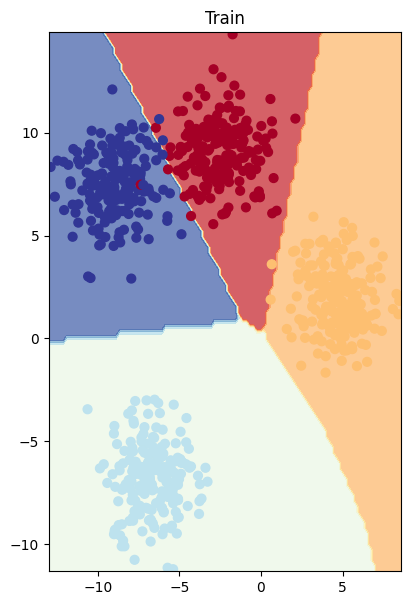

In [56]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

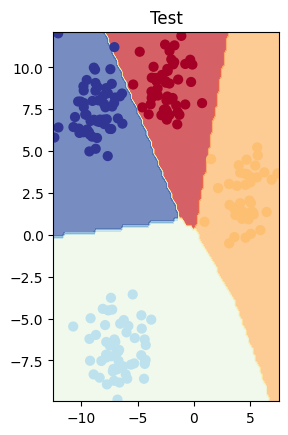

In [57]:
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### Few more classification metrics.....(to evaluate our model)

*  Accuracy = out of 100 how many are correct

*  Precision
*  Recall
*  F1 Score
*  Classification report


In [58]:
!pip install torchmetrics

In [70]:
from torchmetrics import Accuracy

NUM_CLASSES = 4

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)
accuracy = torchmetric_accuracy(y_preds, y_blob_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9950000047683716
